## 9.6 Acc和Loss曲线的绘制


### 1.任务描述

训练手写数字识别网络，获取准确率和损失信息并可视化出来。

### 2.知识准备

见教程。

### 3.任务分析

可以使用如下代码将训练过程中的模型指标提取出来：

### 4.任务实施


执行代码

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.3041 - sparse_categorical_accuracy: 0.9146 - val_loss: 0.1668 - val_sparse_categorical_accuracy: 0.9502
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1388 - sparse_categorical_accuracy: 0.9598 - val_loss: 0.1163 - val_sparse_categorical_accuracy: 0.9662
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0962 - sparse_categorical_accuracy: 0.9714 - val_loss: 0.1049 - val_sparse_categorical_accuracy: 0.9687
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0735 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.0863 - val_sparse_categorical_accuracy: 0.9749
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0588 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.0828 - val_sparse_categorical_accuracy: 0.9753
Model: "sequential"
_________________________________________________________________
 Layer (type)      

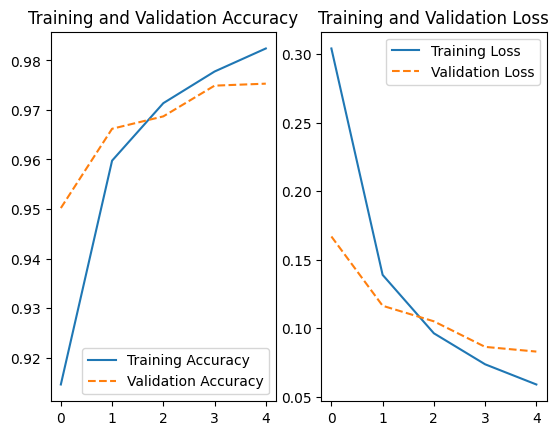

In [3]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

# 加载数据
(x_train, y_train), (x_test, y_test) = mnist = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 创建网络
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 配置网络
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# 执行训练，返回history对象
history = model.fit(
    x_train, 
    y_train, 
    batch_size=64, 
    epochs=5, 
    validation_data=(x_test, y_test), 
    validation_freq=1)

# 打印网络结构
model.summary()

# 显示训练集和测试集的Acc和Loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 可视化准确率
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, '--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# 可视化损失
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, '--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()